# Lab 1
### Introduction to Machine Learning, 2021-2022 period 4

Lab1 is meant to help you get oriented to the programming part of the course, by implementing a simple perceptron.

**1.** Implement the *perceptron learning algorithm* (PLA) (section 1.1.2 in the book) in Python

In [12]:
import numpy as np

In [13]:
def sign(val: float) -> int:
    if np.any(val > 0):
        return 1
    else:
        return -1
    
def initialize_weights(d: int) -> tuple:
    # This initializes a d-dimensional tuple with 0 in all the dimensions
    return tuple([0 for _ in range(d)])

def perceptron(x: tuple, w: tuple) -> int:
    """
    x is a tuple of coordinates; the 0th element is 1. For example, x could be (1, -3.43, 0.75)
    w is a tuple of weights; the 0th element is the bias. For example, w could be (-0.83, 10.96, 1.06)
    
    The return value h should be a hypothesis (+1 or -1) for the datapoint x given the weights w
    """
    
    totaal = 0
    x = np.array(x)
    w = np.array(w)
    h = w*x
    
    for n in h:
        totaal = totaal + n
    h = sign(totaal)
    return h

def update_weights(x_t: tuple, y_t: int, w_t: tuple) -> tuple:
    """
    This is the update rule for the PLA; Eq. 1.3 in the book
    The return value w_t_plus_1 should be the updated weights (w0, w1, w2) at iteration step t+1
    """
    
    w0 = w_t[0]+y_t*x_t[0]
    w1 = w_t[1]+y_t*x_t[1]
    w2 = w_t[2]+y_t*x_t[2]
    w_t_plus_1 = [w0,w1,w2]
    return w_t_plus_1


def learn_weights(xn: list, yn: list) -> tuple:
    """
    This is the main body of the perceptron learning algorithm
    xn is a list of datapoints, each of which is a 3-dimensional tuple containing the coordinates for that point
    (remember the 0th coordinate is equal to 1)
    yn is a list of labels (+1 or -1) for the datapoints
    
    This function should call the functions above
    
    The number of iterations t required for convergence should be printed to the screen before exiting
    
    The return value w should be a tuple containing the learned weights (w0, w1, w2)
    """
    w = initialize_weights(3)
    t = 0
    count = len(xn)
    while count !=0 :
        count = len(xn)
        for n in range(len(xn)):
                outp = perceptron(xn[n],w)
                if outp == yn[n]:
                    count -= 1
                    continue
                else:
                    w = update_weights(xn[n], yn[n], w)

        t += 1
    print(f'Converged in {t} iterations')
    return w

Test your program on a toy dataset of 3 datapoints. Create these datapoints and run your program:

(1, 0.5, 1.5) -> +1

(1, 4.3, -0.3) -> -1

(1, -3.2, 2.2) -> +1

In [14]:
x3 = (1,-3.2,2.2)
y3 = [-1]
w = learn_weights([x3], y3)

Converged in 1 iterations


**2.** Generate a linearly separable dataset in two dimensions: Choose a random 
line in the plane as the target function, where one side of the line maps 
to +1 and the other maps to -1. Choose the inputs $x_n$ ($n=20$) to be random points 
in the plane, and evaluate the target function on each $x_n$ to get the 
corresponding output $y_n$.

In [15]:
import random

SLOPE, INTERCEPT = random.uniform(-10, 10), random.uniform(-10, 10)

MAX_VAL = 100

def get_random_point():
    x1 = random.uniform(-MAX_VAL, MAX_VAL)
    x2 = random.uniform(-MAX_VAL, MAX_VAL)
    return (1, x1, x2)

def target(x):
    """
    x is a datapoint; it is expressed as a tuple of the form (1, x1, x2)
    """
    if x[2] > SLOPE * x[1] + INTERCEPT:
        return 1
    else:
        return -1
    
def generate_data(n: int) -> tuple:
    """
    n is the number of datapoints you want to generate
    The return value should be a tuple with two elements (xn, yn), where xn and yn are both lists of length n
    """
    # FILL IN
    i = 0
    xn = []
    yn = []
    while i<n:
        p = get_random_point()
        xn.append(p)
        i += 1
    for coordinate in xn:
        t = target(coordinate)
        yn.append(t)
    return xn, yn



In [16]:
x20, y20 = generate_data(20)

**3.** Plot the examples ${(x_n, y_n)}$ as well as the target function 
(use `matplotlib`)

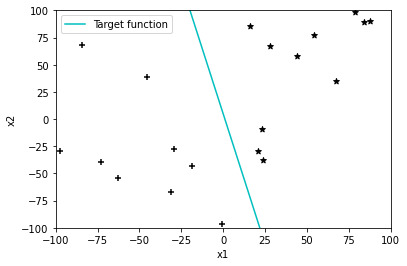

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot_markers(yn: list) -> list:
    """
    Return a list of different markers for +1 and -1 samples
    The return value plot_marker should be a list of length n containing markers
    Each marker is a 1-character string
    There should be 1 marker for +1 and 1 marker for -1
    """
    # FILL IN
    plot_marker=[]
    for uitkomst in yn:
        if uitkomst == 1:
            marker = "*"
            plot_marker.append(marker)
        if uitkomst == -1:
            marker = "+"
            plot_marker.append(marker)
    return plot_marker

def plot(xn, yn):
    # The x axis should be the x1 axis of the data
    # The y axis should be the x2 axis of the data
    # The marker should be different for +1 and -1 samples

    plot_x = [x[1] for x in xn]
    plot_y = [x[2] for x in xn]
    plot_marker = get_plot_markers(yn)

    # Plot the markers of the datapoints
    fig, ax = plt.subplots()
    for xp, yp, m in zip(plot_x, plot_y, plot_marker):
        ax.scatter([xp],[yp], marker=m, color='k')

    # Add the random line used to generate the target function (HINT: use SLOPE and INTERCEPT)
    # FILL IN
    x = np.linspace(-100,100,100)
    yr = SLOPE*x+INTERCEPT
    plt.plot(x,yr,'c', label='Target function')


    # Add axis labels and a legend
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.legend()
    plt.xlim(-MAX_VAL, MAX_VAL)
    plt.ylim(-MAX_VAL, MAX_VAL)
    plt.show()

plot(x20, y20)

4.Run the perceptron algorithm on the above dataset, and add the hypothesis
to the plot. Report the number of iterations.

In [18]:
w = learn_weights(x20,y20)

Converged in 2 iterations


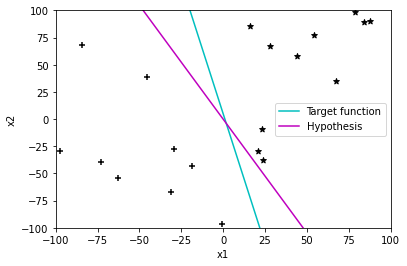

In [19]:
def plot(xn, yn, w):
    # The x axis should be the x1 axis of the data
    # The y axis should be the x2 axis of the data
    # The marker should be different for +1 and -1 samples

    plot_x = [x[1] for x in xn]
    plot_y = [x[2] for x in xn]
    plot_marker = get_plot_markers(yn)

    # Plot the markers of the datapoints
    fig, ax = plt.subplots()
    for xp, yp, m in zip(plot_x, plot_y, plot_marker):
        ax.scatter([xp],[yp], marker=m, color='k')

    # Add the random line used to generate the target function (HINT: use SLOPE and INTERCEPT)
    x = np.linspace(-100,100,100)
    #SLOPE, INTERCEPT = random.uniform(-10, 10), random.uniform(-10, 10)
    yr = SLOPE*x+INTERCEPT
    plt.plot(x,yr,'c', label='Target function')

    # Add the learned hypothesis
    # To plot the hypothesis, we need to convert the weights w0, w1, w2 into a line
    # HINT: you are looking for the line w0 + w1x1 + w2x2 = 0
    y = (-w[1]/w[2])*x+(-w[0]/w[2])
    plt.plot(x,y,'m',label='Hypothesis')

    # Add axis labels and a legend
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.legend()
    plt.xlim(-MAX_VAL, MAX_VAL)
    plt.ylim(-MAX_VAL, MAX_VAL)
    plt.show()

plot(x20, y20, w)

**5.** Generate another random dataset of 20 points, and repeat. Compare with the above results. 

Converged in 3 iterations


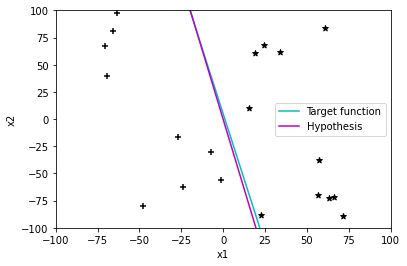

In [20]:
# FILL IN
# Use the same functions provided above
x20, y20 = generate_data(20)
w = learn_weights(x20,y20)
plot(x20, y20, w)

**6.** General a dataset of 1000 points and repeat. Compare with above results.

In [ ]:
# FILL IN
# Use the same functions provided above
x1000, y1000 = generate_data(1000)
w = learn_weights(x1000,y1000)
plot(x1000, y1000, w)

What can you say about what happens when you increase the number of datapoints?

In [ ]:
print("When you increase the number of points, the hypothesis after 1 update of weights approaches the target function better.")